In [2]:
from pprint import pprint
from sklearn.model_selection import train_test_split, cross_val_score
from pandas import read_csv, DataFrame
from scipy.spatial.distance import squareform
from sklearn.decomposition import TruncatedSVD
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim import models, similarities
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [3]:
import networkx as nx
import numpy as np
import nltk as nk
import gensim as fe
import glove
import scipy as sc
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

import seaborn as se
%matplotlib inline

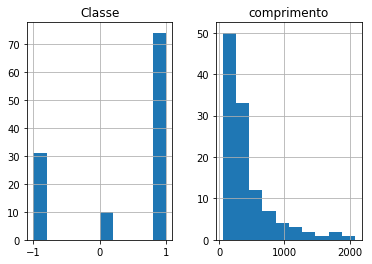

In [4]:
original = read_csv("dados//Estamira//corpus.csv",sep="|")
df = original.copy()
df.hist()
plt.show()

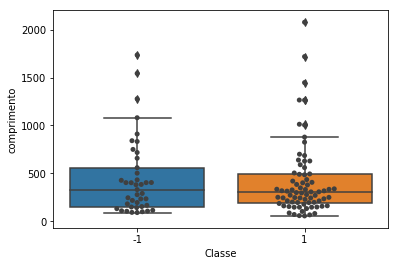

In [5]:
df.Classe = df.Classe.replace(0,-1)
#df.Classe = df.Classe.replace(1,"Estamira")
#df.Classe = df.Classe.replace(-1,"N_Estamira")

data = df.Fala.values.tolist()
target = df.Classe.tolist()

se.swarmplot(x='Classe', y = 'comprimento',data= df,orient="v",color=".25")
se.boxplot(x='Classe', y = 'comprimento',data= df,orient="v")



In [6]:
df.comprimento.describe()

count     115.000000
mean      426.069565
std       387.518414
min        55.000000
25%       179.000000
50%       306.000000
75%       498.000000
max      2079.000000
Name: comprimento, dtype: float64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df.Fala, target, test_size=0.5)


In [14]:
#def geraMedidas(fala):
for fala in df.Fala:
    tolkenizado = [simple_preprocess(str(fala), deacc=True)]
    dataset = glove.Corpus()
    dataset.fit(tolkenizado)
    dataset.matrix

In [123]:
Supor = svm.SVC()
naive = naive_bayes.GaussianNB()
dt =  tree.DecisionTreeClassifier()
knn = KNeighborsClassifier()


Accuracy SVM: 0.60 (+/- 0.31)
Accuracy Naive: 0.64 (+/- 0.20)
Accuracy Decision: 0.44 (+/- 0.23)
Accuracy KNN: 0.43 (+/- 0.39)


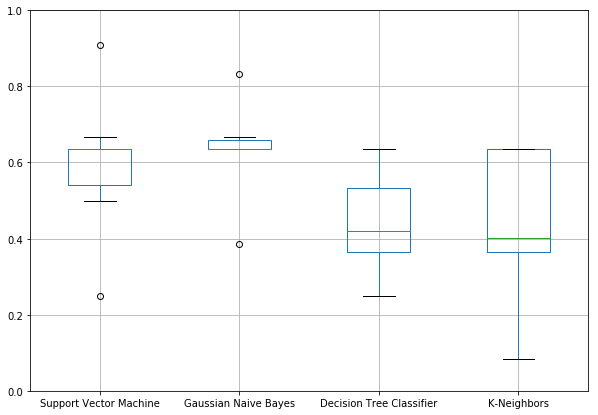

In [124]:

scoresSVM = cross_val_score(Supor, X_medidas, target,cv=10)
print("Accuracy SVM: %0.2f (+/- %0.2f)" %(scoresSVM.mean(), scoresSVM.std() * 2))

scoresNaive = cross_val_score(naive, X_medidas, target,cv=10)
print("Accuracy Naive: %0.2f (+/- %0.2f)" %(scoresNaive.mean(), scoresNaive.std() * 2))

scoresdt = cross_val_score(dt, X_medidas, target,cv=10)
print("Accuracy Decision: %0.2f (+/- %0.2f)" %(scoresdt.mean(), scoresdt.std() * 2))

scoresknn = cross_val_score(knn, X_medidas, target,cv=10)


print("Accuracy KNN: %0.2f (+/- %0.2f)" %(scoresknn.mean(), scoresknn.std() * 2))

a = DataFrame([scoresSVM,scoresNaive,scoresdt,scoresknn]).T

a.columns =  ['Support Vector Machine','Gaussian Naive Bayes','Decision Tree Classifier', 'K-Neighbors']

a.boxplot(figsize=(10, 7))
plt.ylim(0,1)
plt.savefig("boxplot.pdf")

In [80]:
print(f1_score(y_true=Y_test, y_pred = Y_predict))
print(accuracy_score(y_true=Y_test, y_pred = Y_predict))
print(precision_score(y_true=Y_test, y_pred = Y_predict))
print(recall_score(y_true=Y_test, y_pred = Y_predict))

0.75
0.6206896551724138
0.6346153846153846
0.9166666666666666


In [99]:
print([int(x) for x in Y_test])
print(Y_predict)


[1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1]
[ 1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1  1  1]


In [111]:
print(Y_test)
print(Y_predict)


[1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [100]:
import math

Mcontext = corpus.matrix.copy()   # add-2 smoothing

V = np.shape(corpus.matrix)[1]

N    = np.sum(Mcontext)
PPMI = np.zeros((V, V))

Fw   = np.sum(Mcontext, axis=1) # somatoria de cada linha
Fc   = np.sum(Mcontext, axis=0) # somatoria de cada coluna

for i in range(0, V): 
    for j in range(0, V): 
        PPMI[i,j] = max(0, math.log2((Mcontext[i,j]/N)/(Fw[i]/N*Fc[j]/N)) )



NameError: name 'corpus' is not defined

In [122]:
cross_val_score?
